### The main objective of this project is to build several classification model for the given data and find the best model based on the classification metrics

In [138]:
# Importing the required library

# Numpy and Pandas
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import plot_tree

# Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,LeaveOneOut,cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier



# Evaluation Metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Data imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Grid Search
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df

Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms roof  \
0        1          339       6          5            4           6   NO   
1        2          358       5          4            3           4  YES   
2        3          324       7          5            4           5  YES   
3        4          330       6          4            3           5  YES   
4        5          320       7          4            4           5   NO   
...    ...          ...     ...        ...          ...         ...  ...   
2995  2996          341       9          6            5           7  YES   
2996  2997          292       9          8            7           8  YES   
2997  2998          328       7          4            3           5   NO   
2998  2999          293       9          7            7           8   NO   
2999  3000          343       7          6            6           8   NO   

      Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expected price Grade  
0              0          76        2   79    6            3481     D  
1             71          96        3   72    4            3510     D  
2            101         117        5   64    3            3748     C  
3            101          82        2   59    2            3134     D  
4              0          75        3   40    1            3843     D  
...          ...         ...      ...  ...  ...             ...   ...  
2995          95         115        5   90    2            4246     B  
2996         116          87        7   97    4            3753     A  
2997           0          78        5   95    6            3607     D  
2998           0          78        7   51    3            4198     B  
2999           0         108        5   95    3            4105     C  

[3000 rows x 14 columns]

### Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [4]:
df.describe()

Id  Area(total)       Trooms    Nbedrooms  Nbwashrooms  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean   1500.500000   325.117000     7.021667     5.023000     4.513667   
std     866.169729    20.507742     1.421221     1.634838     1.715263   
min       1.000000   290.000000     5.000000     2.000000     1.000000   
25%     750.750000   308.000000     6.000000     4.000000     3.000000   
50%    1500.500000   325.000000     7.000000     5.000000     4.000000   
75%    2250.250000   343.000000     8.000000     6.000000     6.000000   
max    3000.000000   360.000000     9.000000     8.000000     8.000000   

        Twashrooms   Roof(Area)   Lawn(Area)      Nfloors          API  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      6.010667    48.980667    95.609333     4.013333    70.190667   
std       1.786136    48.746641    14.837388     1.621532    17.563460   
min       2.000000     0.000000    70.000000     1.000000    40.000000   
25%       5.000000     0.000000    83.000000     3.000000    55.000000   
50%       6.000000    71.000000    96.000000     4.000000    70.000000   
75%       7.000000    96.000000   109.000000     5.000000    85.000000   
max      10.000000   120.000000   120.000000     7.000000   100.000000   

              ANB  Expected price  
count  3000.00000     3000.000000  
mean      3.47900     3782.938333  
std       1.69426      567.189995  
min       1.00000     2504.000000  
25%       2.00000     3354.000000  
50%       4.00000     3771.000000  
75%       5.00000     4208.000000  
max       6.00000     5216.000000

In [5]:
df['Grade'].value_counts()

D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64

## EDA

### Univariate - Distribution of all the Numerical column

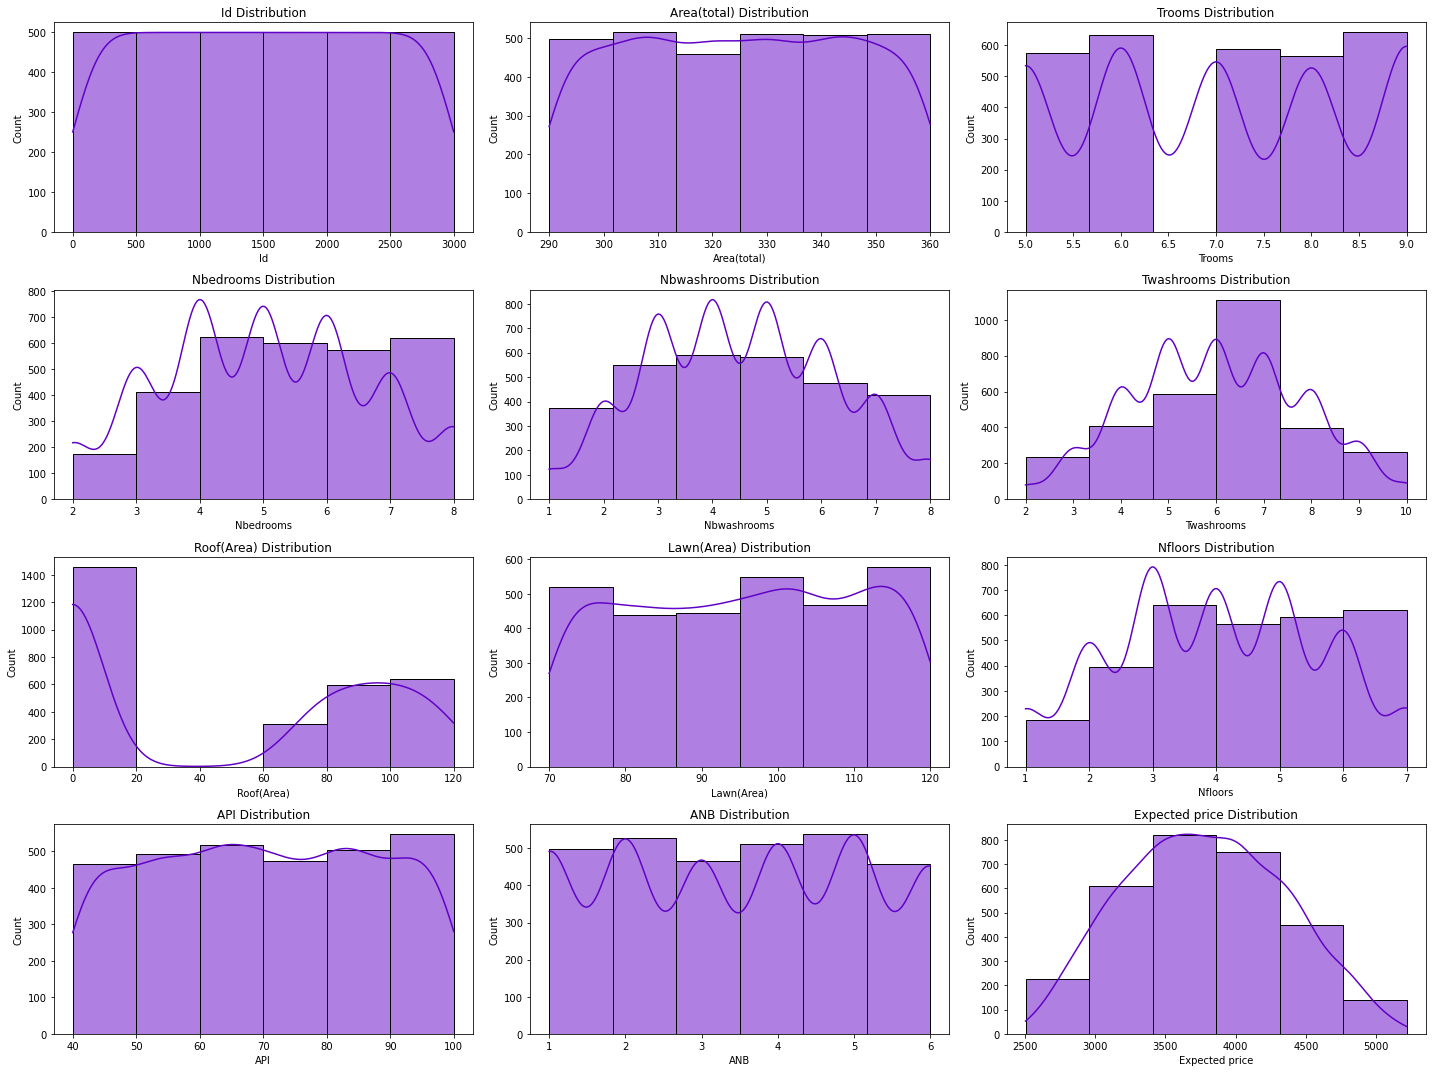

In [6]:
fig,ax = plt.subplots(1,2,figsize = (20,15))
color = sb.color_palette('gnuplot')[0:1]

columns = ['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
            'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Expected price']
a = 1
for i in columns:
    plt.subplot(4,3,a)
    sb.histplot(x = df[i],color=color,kde=True,bins = 6)
    plt.title(f'{i} Distribution')
    a += 1

plt.tight_layout()
plt.show()

* The distribution of all the numerical column can be seen above
* Most of the distribution can be said to have a normal distribution
* Price distribution, Twashrooms is distributed normally

### Univarite - Understanding about the outliers

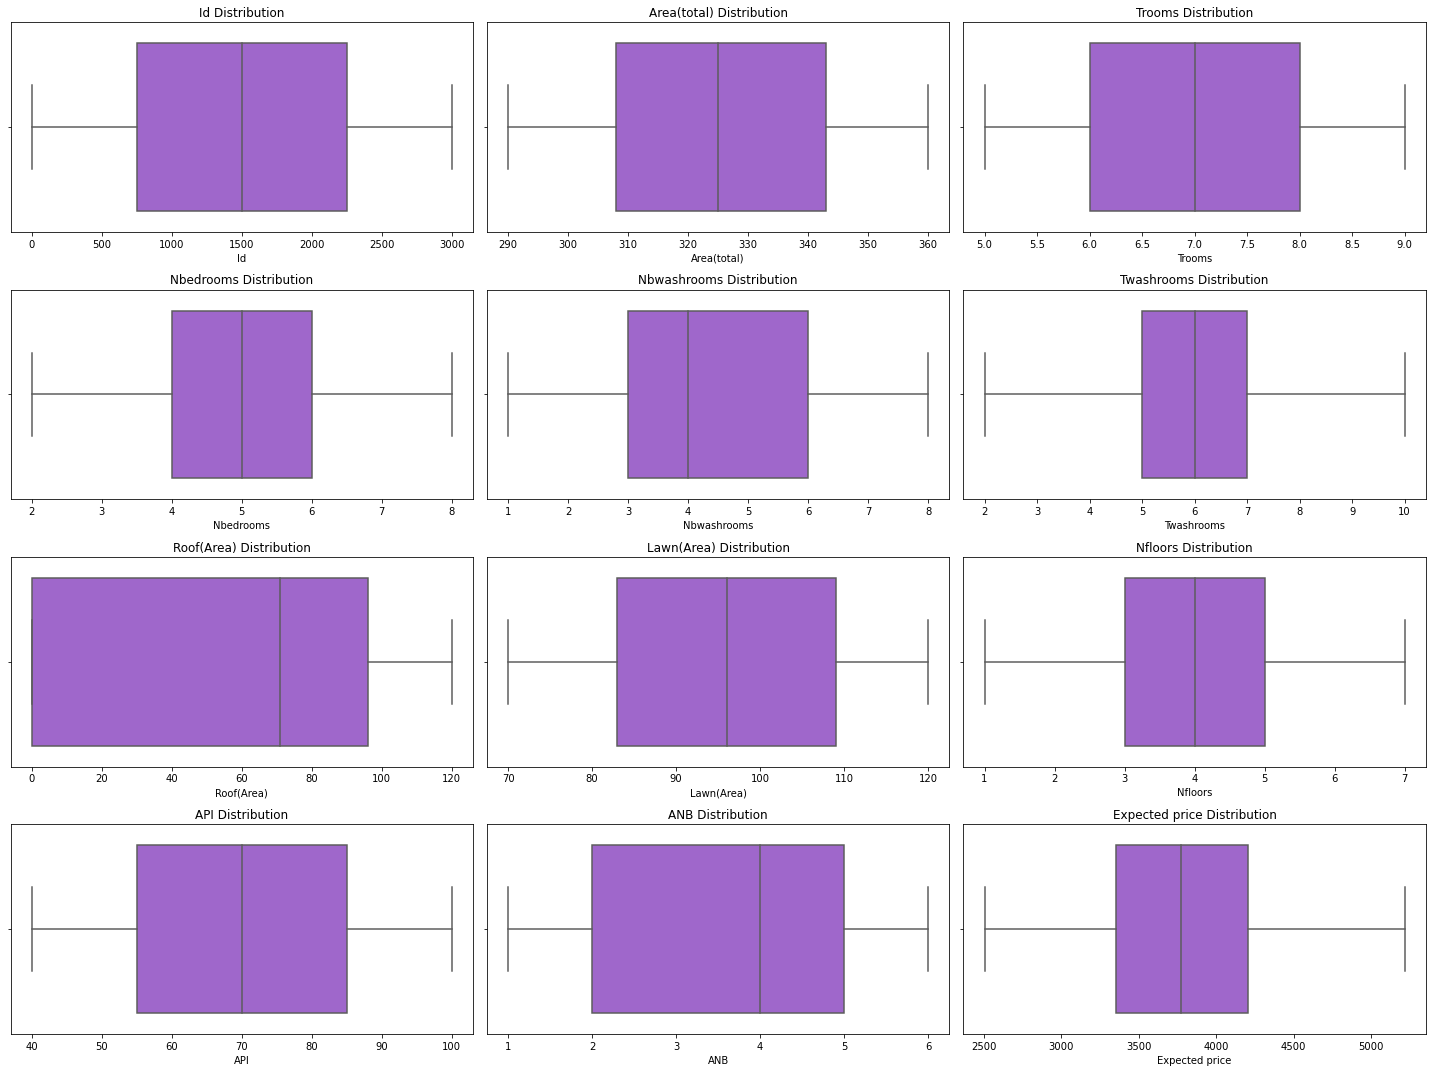

In [7]:
fig,ax = plt.subplots(1,2,figsize = (20,15))
color = sb.color_palette('hls',8)[6:7]

columns = ['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
            'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Expected price']
a = 1
for i in columns:
    plt.subplot(4,3,a)
    sb.boxplot(x = df[i],palette=color)
    plt.title(f'{i} Distribution')
    a += 1

plt.tight_layout()
plt.show()

* The boxplot can be used to understand the outliers in the data
* There are no ouliers in any of the features


### Univariate - Categorical column

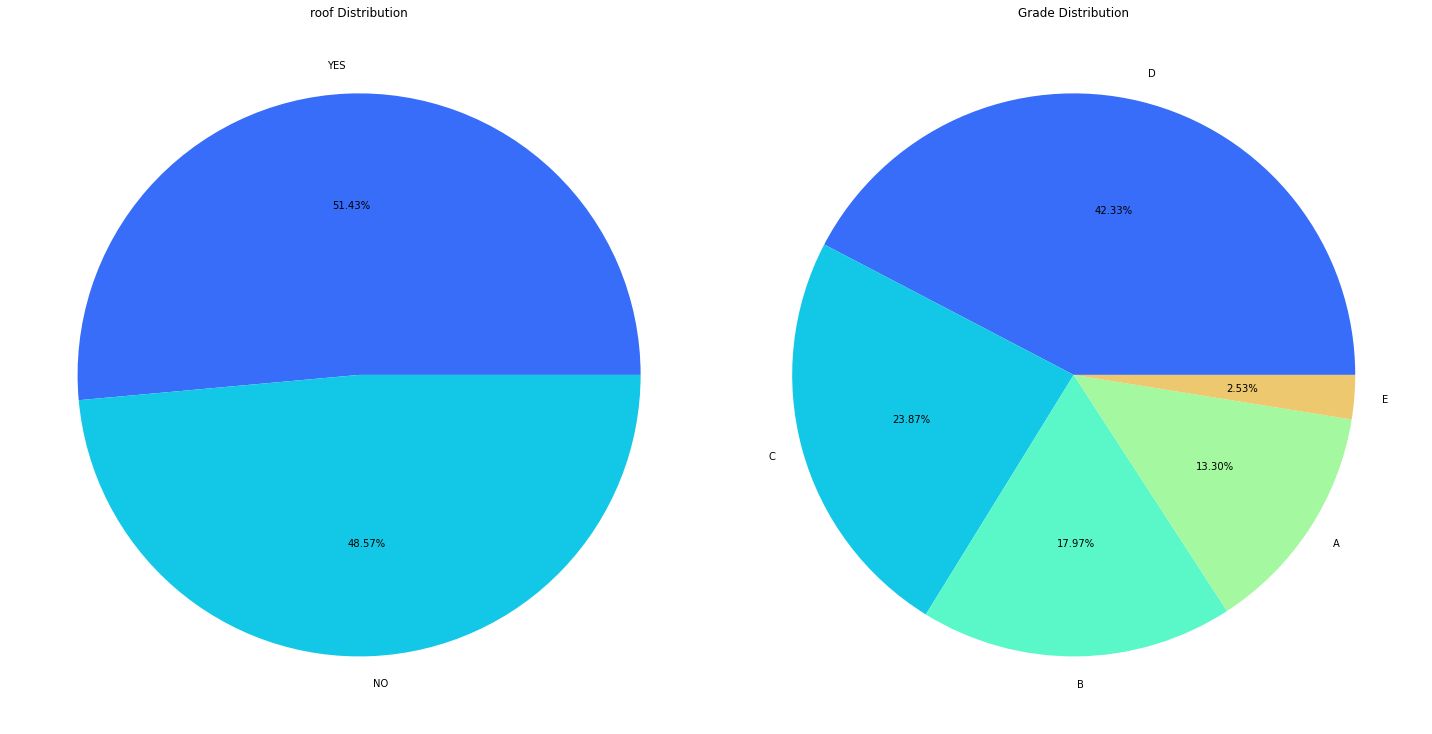

In [8]:
fig,ax = plt.subplots(1,2,figsize = (20,15))
columns_cat = ['roof','Grade']
b = 1

for i in columns_cat:
    plt.subplot(1,2,b)
    data = df[i].value_counts()
    label = data.keys()
    plt.pie(data,labels=label,autopct='%.2f%%',colors=sb.color_palette('rainbow'))
    plt.title(f'{i} Distribution')
    b += 1

plt.tight_layout()
plt.show()

* The houses having roof is more than hoses with no roof
* More nuber of D-Grade houses are more followed by C-Grade and B-Grade
* Grade-E has the least number of houses

### Bivariate - Categorical Column With respect to target column (Grade)

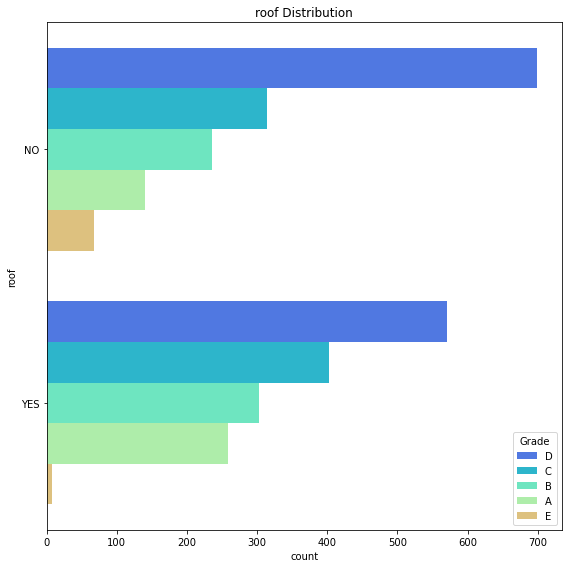

In [9]:
fig,ax = plt.subplots(1,1,figsize = (8,8))
columns_cat = ['roof']
b = 1
color = sb.color_palette('gnuplot')[0:1]
for i in columns_cat:
    plt.subplot(1,1,b)
    sb.countplot(y = df[i],hue=df['Grade'],palette=sb.color_palette('rainbow'))
    plt.title(f'{i} Distribution')
    b += 1

plt.tight_layout()
plt.show()

* If there are no roof in the then the house is given a bad grae
* There are more D-Grade for the no roof houses 

### Bivariate - Numerical Column With respect to target column (Grade)

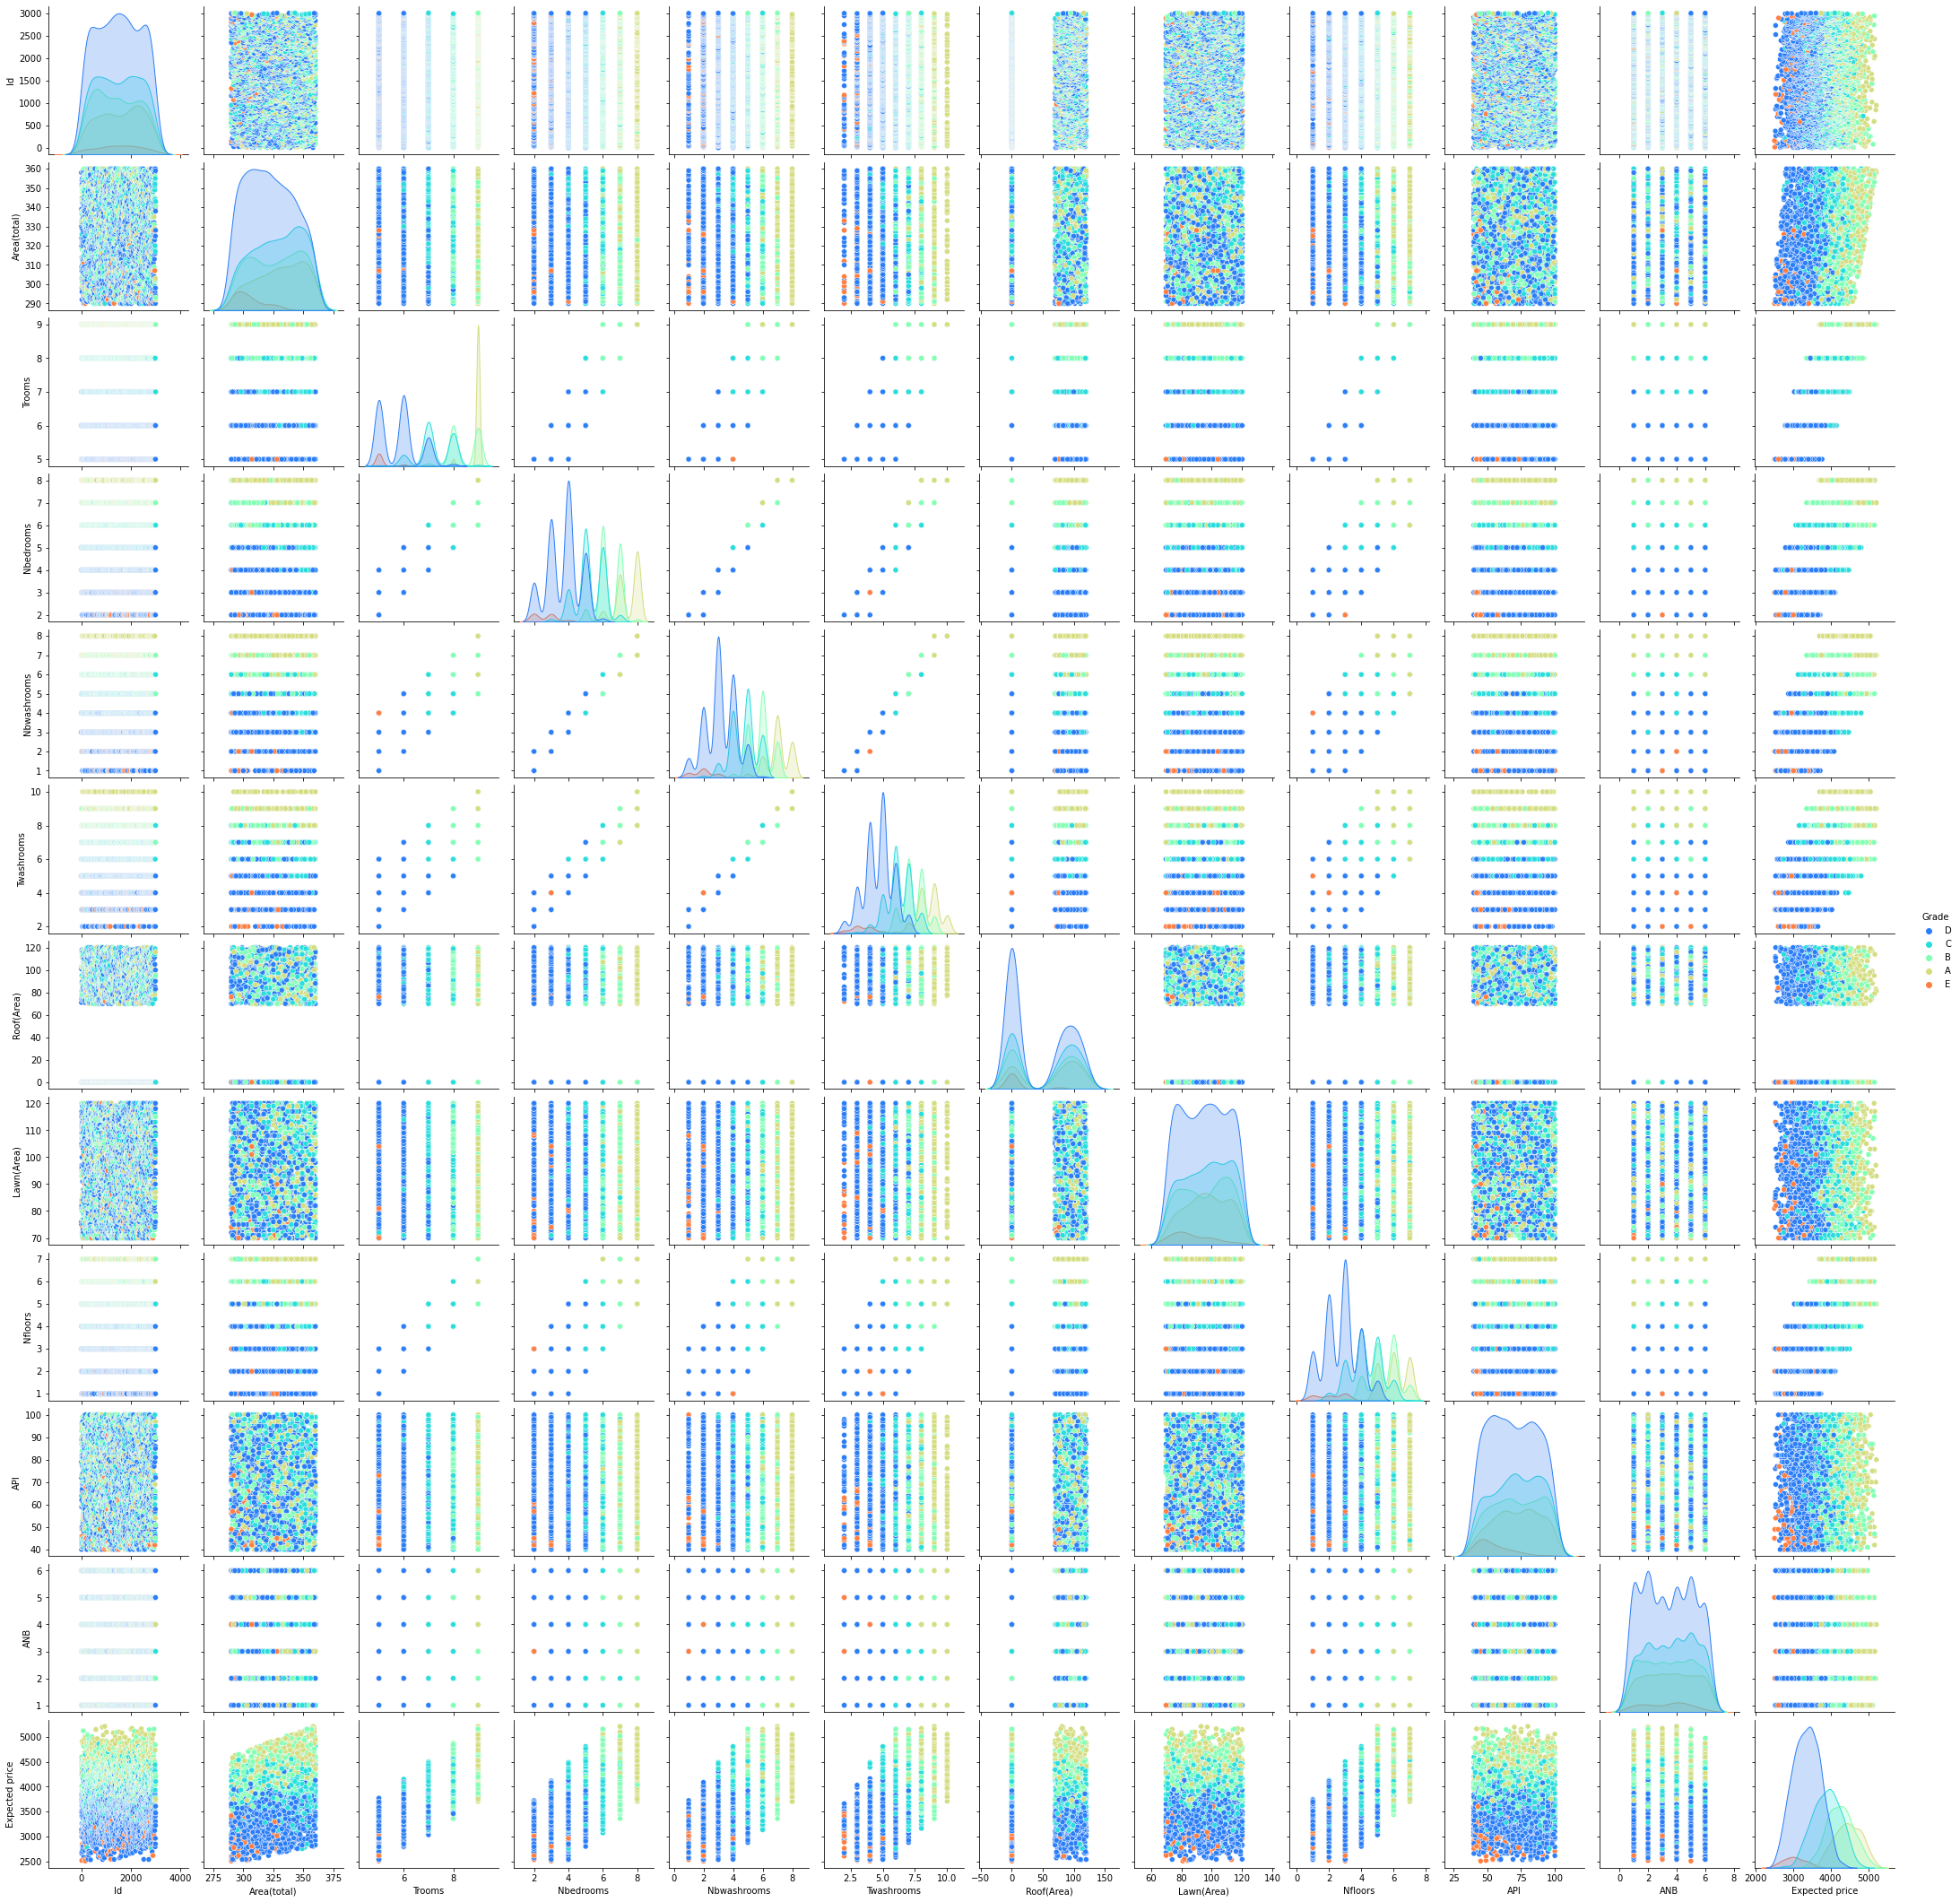

In [10]:
sb.pairplot(df,hue='Grade',palette='rainbow')
plt.show()

### Multivariate - Based on target column

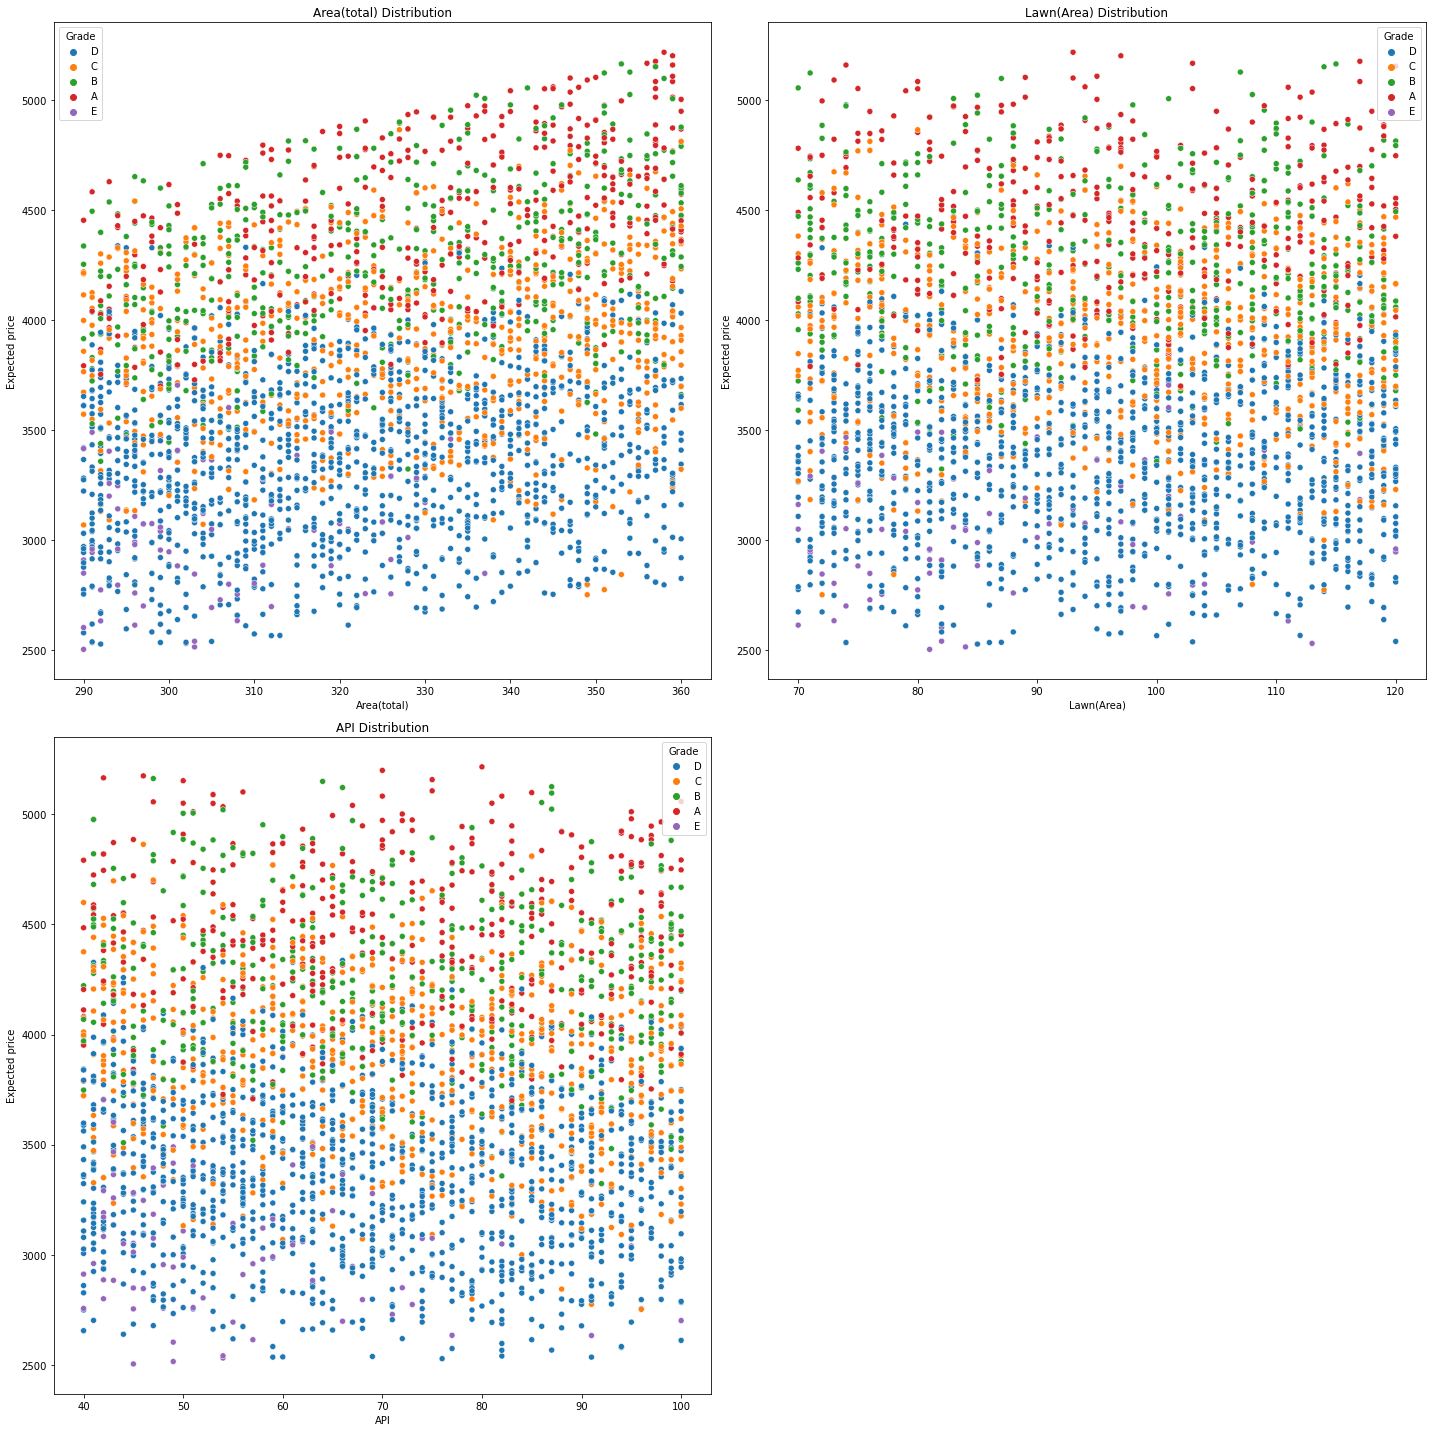

In [11]:
fig,ax = plt.subplots(figsize = (20,20))
color = sb.color_palette('gnuplot')[0:1]

scatter = ['Area(total)','Lawn(Area)','API']
a = 1
for i in scatter:
    plt.subplot(2,2,a)
    sb.scatterplot(x = df[i],y=df['Expected price'],hue=df['Grade'],color=color)
    plt.title(f'{i} Distribution')
    a += 1

plt.tight_layout()
plt.show()

* The above plots shows the bivariate distributon of of all the numerical columns based on the classification of Grade
* Since the data is spread the overlap of Grade is more
* The number of D-Grade houses are more and they have low price 

## Data Preprocessing

### Checking Null Values

In [12]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

* There are no null values in the data

### Understanding the Datatypes of data

In [13]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

### Converting the object datatype to int using label encoder

In [14]:
df1 = df.copy()

In [15]:
label_encoder = LabelEncoder()

for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i] = label_encoder.fit_transform(df[i])
        
df1.dtypes

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int32
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int32
dtype: object

### Feature Selection using the correlation

In [16]:
corr = df1.corr()
corr.style.background_gradient(cmap = 'Purples')

* The features having correlation greater than 0.1 threshold is selected and used for further analysis
* Fetaures like id,lawn(area),API,ANB have very low correlation with the target column and cannot be used
* If these columns are used the performance of the machine learning model will reduce 
* Hence we are to drop these columns 

### Finding if there is high correlation between the independent features

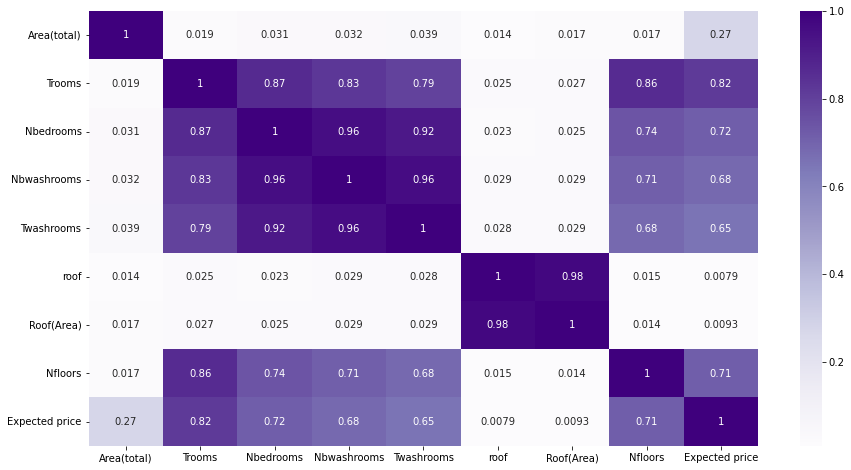

In [17]:
fig,ax = plt.subplots(figsize = (15,8))
corr = df1.drop(columns=['Id','Grade','API','ANB','Lawn(Area)']).corr()
sb.heatmap(corr,cmap = 'Purples',annot = True)
plt.show()

* There are some highly correlated independent columns in the data
* The roof and roof area are very high correlated , it signifies the same things hence we can drop roof column

In [18]:
df1.head()

Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms  roof  \
0   1          339       6          5            4           6     0   
1   2          358       5          4            3           4     1   
2   3          324       7          5            4           5     1   
3   4          330       6          4            3           5     1   
4   5          320       7          4            4           5     0   

   Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expected price  Grade  
0           0          76        2   79    6            3481      3  
1          71          96        3   72    4            3510      3  
2         101         117        5   64    3            3748      2  
3         101          82        2   59    2            3134      3  
4           0          75        3   40    1            3843      3

In [19]:
### Using only the selected features

data = df1.drop(columns=['Id','roof','API','ANB','Lawn(Area)'])
data.head()

Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms  Roof(Area)  \
0          339       6          5            4           6           0   
1          358       5          4            3           4          71   
2          324       7          5            4           5         101   
3          330       6          4            3           5         101   
4          320       7          4            4           5           0   

   Nfloors  Expected price  Grade  
0        2            3481      3  
1        3            3510      3  
2        5            3748      2  
3        2            3134      3  
4        3            3843      3

### Splitting the data using the Hold out Method

In [101]:
# Splitting of Data

x = data.drop(columns = 'Grade')   
y = data['Grade']                  # For y taking the target column


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1000)  # Taking 80:20 ratio for train and test
print(f"Shape of X Traindata = {x_train.shape},X Testdata = {x_test.shape}")
print(f"Shape of Y Traindata = {y_train.shape},Y Testdata = {y_test.shape}")

Shape of X Traindata = (2400, 8),X Testdata = (600, 8)
Shape of Y Traindata = (2400,),Y Testdata = (600,)


### Normalizing the data

In [102]:
# Normalizing only the independant features
scale = MinMaxScaler()
x = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x.head()

Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms  Roof(Area)  \
0     0.700000    0.25   0.500000     0.428571       0.500    0.000000   
1     0.971429    0.00   0.333333     0.285714       0.250    0.591667   
2     0.485714    0.50   0.500000     0.428571       0.375    0.841667   
3     0.571429    0.25   0.333333     0.285714       0.375    0.841667   
4     0.428571    0.50   0.333333     0.428571       0.375    0.000000   

    Nfloors  Expected price  
0  0.166667        0.360251  
1  0.333333        0.370944  
2  0.666667        0.458702  
3  0.166667        0.232301  
4  0.333333        0.493732

## Building the Classification Models

### 1. Logistic Regression

In [125]:
log = LogisticRegression().fit(x_train,y_train)

# predicting the test data
log_pred = log.predict(x_test)
log_pred

array([0, 0, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 1, 0, 3, 3, 2, 1, 1,
       2, 3, 2, 3, 3, 2, 0, 3, 1, 1, 0, 3, 0, 2, 0, 2, 3, 3, 2, 2, 1, 3,
       3, 3, 3, 3, 3, 3, 2, 0, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1, 2, 2, 1,
       0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 2, 1, 2, 3, 3, 0, 3, 2, 3, 3, 2,
       2, 0, 3, 2, 2, 1, 3, 2, 0, 2, 2, 0, 1, 3, 1, 3, 3, 3, 2, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 3, 0, 3, 2, 2, 2, 1, 0, 2, 3, 3, 2, 3, 3, 3, 2,
       1, 1, 3, 3, 2, 2, 0, 3, 3, 2, 3, 2, 3, 2, 3, 3, 1, 3, 3, 2, 0, 1,
       3, 3, 0, 1, 3, 0, 3, 3, 3, 1, 2, 0, 1, 1, 3, 1, 3, 3, 2, 3, 3, 1,
       2, 0, 1, 1, 2, 3, 1, 2, 3, 3, 3, 0, 3, 2, 3, 2, 2, 1, 2, 3, 3, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 3, 2, 3, 2, 1, 2, 1, 1, 3, 3, 3, 2, 3, 2,
       3, 0, 3, 3, 3, 3, 0, 1, 3, 1, 3, 2, 2, 0, 3, 3, 2, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 1, 3, 2, 3, 0, 0,
       3, 3, 3, 0, 3, 1, 2, 3, 2, 2, 3, 0, 3, 3, 2, 2, 1, 3, 2, 2, 3, 1,
       2, 3, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 1, 1, 0,

### 2. NaiveBayes

In [126]:
nb = GaussianNB().fit(x_train,y_train)

# predicting the test data
nb_pred = log.predict(x_test)
nb_pred

array([0, 0, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 1, 0, 3, 3, 2, 1, 1,
       2, 3, 2, 3, 3, 2, 0, 3, 1, 1, 0, 3, 0, 2, 0, 2, 3, 3, 2, 2, 1, 3,
       3, 3, 3, 3, 3, 3, 2, 0, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1, 2, 2, 1,
       0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 2, 1, 2, 3, 3, 0, 3, 2, 3, 3, 2,
       2, 0, 3, 2, 2, 1, 3, 2, 0, 2, 2, 0, 1, 3, 1, 3, 3, 3, 2, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 3, 0, 3, 2, 2, 2, 1, 0, 2, 3, 3, 2, 3, 3, 3, 2,
       1, 1, 3, 3, 2, 2, 0, 3, 3, 2, 3, 2, 3, 2, 3, 3, 1, 3, 3, 2, 0, 1,
       3, 3, 0, 1, 3, 0, 3, 3, 3, 1, 2, 0, 1, 1, 3, 1, 3, 3, 2, 3, 3, 1,
       2, 0, 1, 1, 2, 3, 1, 2, 3, 3, 3, 0, 3, 2, 3, 2, 2, 1, 2, 3, 3, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 3, 2, 3, 2, 1, 2, 1, 1, 3, 3, 3, 2, 3, 2,
       3, 0, 3, 3, 3, 3, 0, 1, 3, 1, 3, 2, 2, 0, 3, 3, 2, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 1, 3, 2, 3, 0, 0,
       3, 3, 3, 0, 3, 1, 2, 3, 2, 2, 3, 0, 3, 3, 2, 2, 1, 3, 2, 2, 3, 1,
       2, 3, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 1, 1, 0,

### Hyper_Parameter Tuning for DT,RF,Adaboost

In [24]:
def best_para(model_name):
    depth =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,20,30]
    sample = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,50,100,200]
    estimators = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,50,100,200]
    f1 = []
    acc_train = []
    acc_test = []
    pres = []
    recal =[]
    min_leaf_sample_l =[]
    dep = []
    n_estimators_l = []

    if model_name.lower() == 'dt':
        for i in depth:
            for j in sample:
                dt = DecisionTreeClassifier(max_depth=i,min_samples_leaf=j).fit(x_train,y_train)
                tr = dt.score(x_train,y_train) 
                te = dt.score(x_test,y_test)
                p = dt.predict(x_test)
                dt_prec = precision_score(y_test,p,average = 'weighted')  
                dt_recall = recall_score(y_test,p,average = 'weighted')
                dt_f1 = f1_score(y_test,p,average = 'weighted')

                f1.append(dt_f1)
                pres.append(dt_prec)
                acc_train.append(tr*100)
                acc_test.append(te*100)
                recal.append(dt_recall)
                min_leaf_sample_l.append(j)
                dep.append(i)

        d = pd.DataFrame({'Depth':dep,
                          'Min_leaf_Sample':min_leaf_sample_l,
                         'Train_acc':acc_train,
                         'Test_acc':acc_test,
                         'Precision':pres,
                         'Recall':recal,
                         'F1':f1})
        return(d)  
    
    elif model_name.lower() == 'rf':
        for i in depth:
            for j in sample:
                for k in estimators:
                    rf = RandomForestClassifier(max_depth=i,min_samples_leaf=j,n_estimators = k).fit(x_train,y_train)
                    tr = rf.score(x_train,y_train) 
                    te = rf.score(x_test,y_test)
                    p = rf.predict(x_test)
                    dt_prec = precision_score(y_test,p,average = 'weighted')  
                    dt_recall = recall_score(y_test,p,average = 'weighted')
                    dt_f1 = f1_score(y_test,p,average = 'weighted')

                    f1.append(dt_f1)
                    pres.append(dt_prec)
                    acc_train.append(tr*100)
                    acc_test.append(te*100)
                    recal.append(dt_recall)
                    min_leaf_sample_l.append(j)
                    dep.append(i)
                    n_estimators_l.append(k)

        d = pd.DataFrame({'Depth':dep,
                          'Min_leaf_Sample':min_leaf_sample_l,
                          'Estimators':n_estimators_l,
                         'Train_acc':acc_train,
                         'Test_acc':acc_test,
                         'Precision':pres,
                         'Recall':recal,
                         'F1':f1})
    
        return(d)
    
    elif model_name.lower() == 'ab':
        for i in estimators:
            ab = AdaBoostClassifier(n_estimators=i).fit(x_train,y_train)
            tr = ab.score(x_train,y_train) 
            te = ab.score(x_test,y_test)
            p = ab.predict(x_test)
            dt_prec = precision_score(y_test,p,average = 'weighted')  
            dt_recall = recall_score(y_test,p,average = 'weighted')
            dt_f1 = f1_score(y_test,p,average = 'weighted')

            f1.append(dt_f1)
            pres.append(dt_prec)
            acc_train.append(tr*100)
            acc_test.append(te*100)
            recal.append(dt_recall)
            n_estimators_l.append(i)

        d = pd.DataFrame({
                          'Estimators':n_estimators_l,
                         'Train_acc':acc_train,
                         'Test_acc':acc_test,
                         'Precision':pres,
                         'Recall':recal,
                         'F1':f1})
    
    return(d)

In [105]:
dt_models = best_para('dt')
dt_models.sort_values(by='Test_acc',ascending=False)

Depth  Min_leaf_Sample  Train_acc   Test_acc  Precision    Recall  \
176     10                6  90.833333  87.500000   0.876867  0.875000   
290     30                6  91.000000  87.000000   0.872141  0.870000   
214     12                6  91.000000  87.000000   0.872034  0.870000   
195     11                6  91.000000  86.666667   0.869120  0.866667   
233     13                6  91.000000  86.500000   0.867348  0.865000   
..     ...              ...        ...        ...        ...       ...   
15       1               20  55.416667  55.000000   0.455865  0.550000   
16       1               50  55.416667  55.000000   0.455865  0.550000   
17       1              100  55.416667  55.000000   0.455865  0.550000   
18       1              200  55.416667  55.000000   0.455865  0.550000   
0        1                1  55.416667  55.000000   0.455865  0.550000   

           F1  
176  0.875783  
290  0.870736  
214  0.870711  
195  0.867220  
233  0.865430  
..        ...  
15   0.474209  
16   0.474209  
17   0.474209  
18   0.474209  
0    0.474209  

[304 rows x 7 columns]

### 3. DecisionTree

In [127]:
dt = DecisionTreeClassifier(max_depth = 10,min_samples_leaf=6).fit(x_train,y_train)

# predicting the test data
dt_pred = dt.predict(x_test)
dt_pred

array([0, 1, 3, 2, 1, 1, 4, 3, 3, 0, 0, 3, 1, 2, 1, 2, 2, 3, 3, 2, 1, 2,
       0, 3, 4, 2, 3, 1, 0, 2, 3, 1, 0, 3, 0, 2, 0, 3, 2, 2, 3, 1, 0, 2,
       3, 2, 0, 3, 3, 3, 3, 0, 1, 3, 0, 3, 0, 2, 3, 2, 3, 3, 0, 0, 2, 0,
       0, 2, 3, 2, 0, 3, 3, 3, 3, 3, 0, 1, 2, 3, 2, 3, 0, 3, 1, 3, 3, 2,
       0, 1, 3, 1, 2, 3, 3, 1, 2, 0, 3, 0, 2, 2, 2, 3, 3, 3, 1, 1, 3, 3,
       3, 1, 1, 3, 3, 3, 3, 0, 2, 3, 1, 1, 0, 0, 2, 3, 3, 1, 3, 2, 3, 3,
       1, 0, 3, 3, 0, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 2, 3, 3, 1, 2,
       3, 3, 1, 1, 3, 1, 2, 3, 3, 1, 2, 0, 1, 3, 4, 1, 2, 3, 3, 2, 3, 0,
       1, 0, 0, 1, 3, 3, 0, 1, 3, 2, 2, 1, 3, 3, 3, 3, 1, 1, 3, 3, 4, 3,
       1, 1, 0, 3, 2, 0, 3, 3, 2, 1, 3, 2, 2, 2, 2, 1, 3, 3, 3, 0, 3, 2,
       3, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 2, 1, 2, 3, 4, 1, 2, 3, 3, 2, 3,
       3, 3, 3, 3, 0, 0, 1, 3, 3, 1, 3, 2, 2, 1, 2, 2, 2, 3, 3, 3, 1, 0,
       3, 3, 3, 0, 2, 0, 3, 3, 0, 3, 3, 1, 3, 3, 1, 1, 2, 2, 3, 2, 2, 1,
       2, 3, 3, 2, 3, 3, 3, 1, 2, 1, 3, 1, 1, 1, 0,

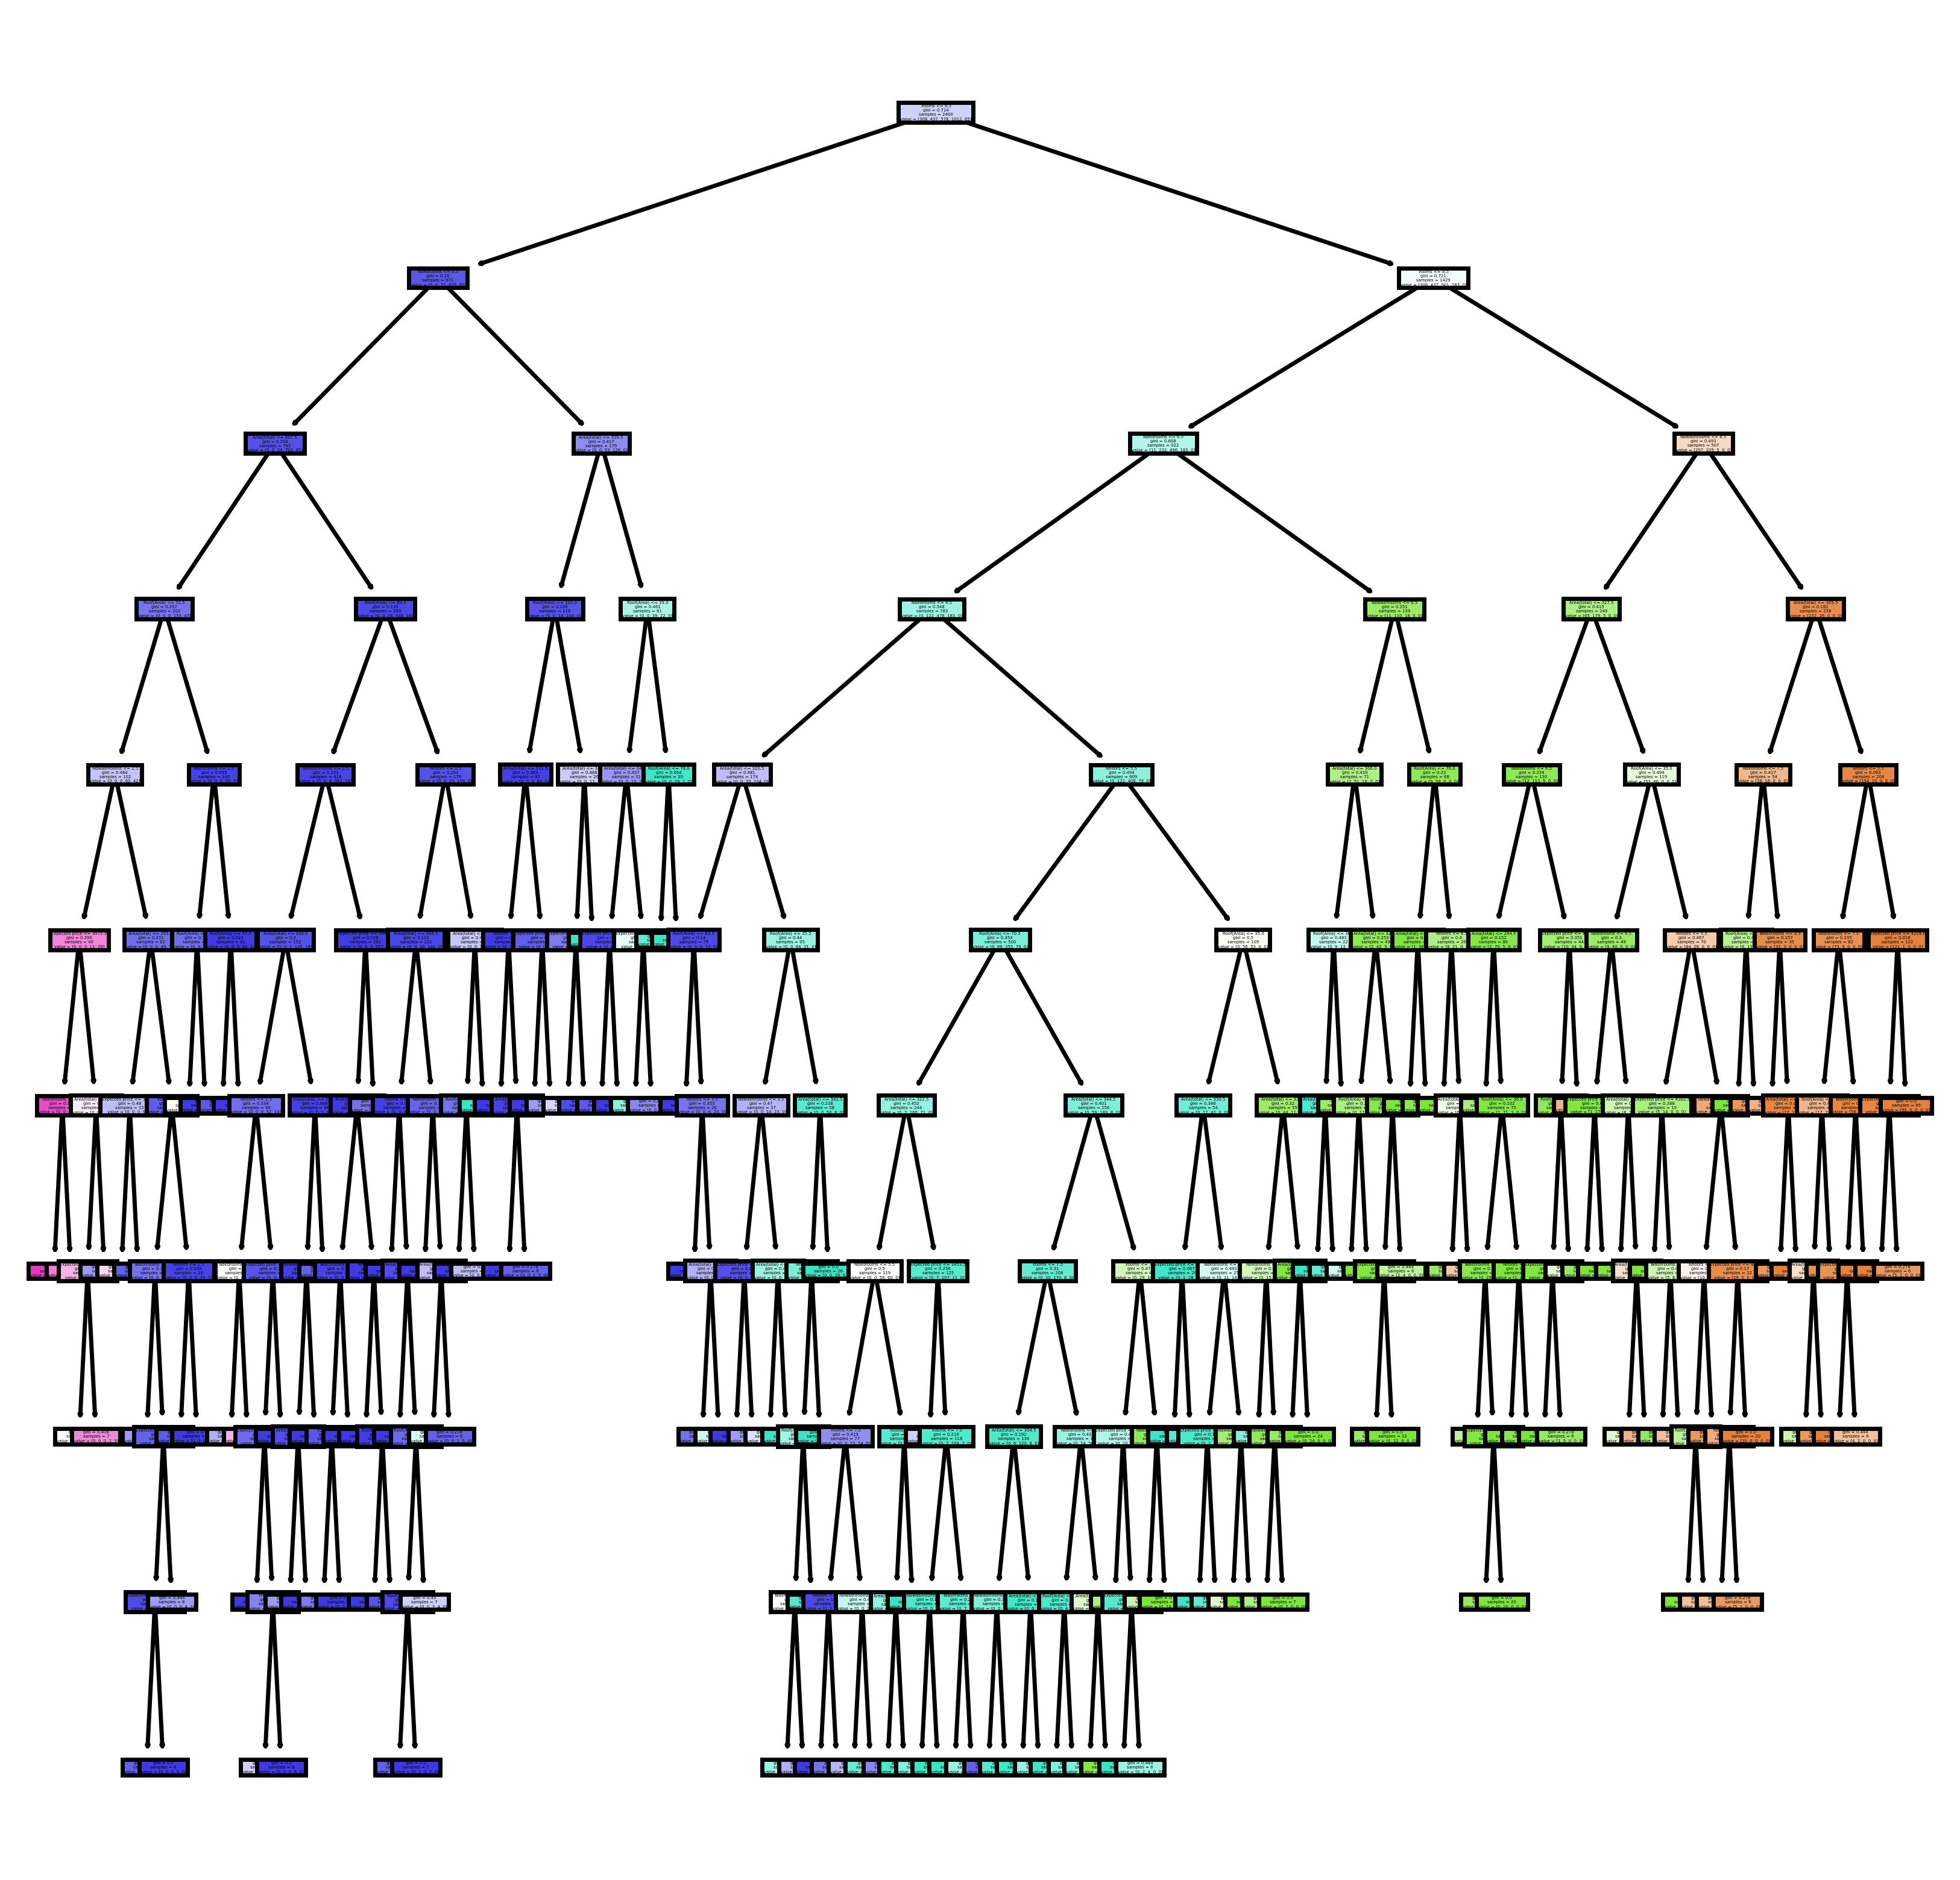

In [128]:
fig, ax = plt.subplots(1,1,figsize = (8,8), dpi=500)

plot_tree(dt,
           feature_names = x.columns, 
           filled = True);

fig.savefig('Decision_Tree.png')

### 4. RandomForest (Ensemble)

In [107]:
rf_models = best_para('rf')
rf_models.sort_values(by='Test_acc',ascending=False)

Depth  Min_leaf_Sample  Estimators  Train_acc   Test_acc  Precision  \
3261     10                1          13  96.583333  89.000000   0.890314   
4360     13                2          10  95.625000  88.833333   0.888137   
3644     11                2          20  95.291667  88.666667   0.886611   
5443     30                2          10  95.041667  88.666667   0.884958   
5447     30                2          14  95.833333  88.500000   0.885203   
...     ...              ...         ...        ...        ...        ...   
152       1                9           1  52.791667  51.666667   0.384747   
231       1               13           4  51.041667  48.833333   0.333802   
116       1                7           3  44.500000  45.166667   0.250569   
247       1               14           1  42.166667  43.000000   0.184900   
95        1                6           1  42.166667  43.000000   0.184900   

        Recall        F1  
3261  0.890000  0.889288  
4360  0.888333  0.887163  
3644  0.886667  0.886142  
5443  0.886667  0.885745  
5447  0.885000  0.884975  
...        ...       ...  
152   0.516667  0.422747  
231   0.488333  0.396257  
116   0.451667  0.302728  
247   0.430000  0.258601  
95    0.430000  0.258601  

[5776 rows x 8 columns]

In [129]:
rf = RandomForestClassifier(max_depth=10,min_samples_leaf=1,n_estimators = 13).fit(x_train,y_train)

# predicting the test data
rf_pred = rf.predict(x_test)
rf_pred

array([0, 1, 2, 2, 1, 1, 3, 3, 3, 0, 0, 3, 1, 2, 1, 2, 2, 3, 3, 2, 1, 2,
       1, 3, 3, 2, 3, 1, 1, 2, 2, 1, 0, 3, 0, 2, 0, 2, 2, 2, 3, 1, 0, 2,
       3, 3, 1, 3, 2, 3, 3, 0, 1, 3, 0, 3, 0, 2, 3, 2, 3, 3, 0, 0, 2, 0,
       0, 2, 3, 2, 0, 3, 2, 3, 3, 3, 0, 1, 2, 3, 2, 3, 0, 3, 1, 3, 3, 2,
       0, 0, 3, 1, 1, 3, 3, 1, 2, 0, 2, 0, 2, 2, 2, 3, 3, 3, 0, 1, 3, 3,
       3, 1, 0, 3, 3, 3, 2, 0, 2, 3, 1, 1, 0, 0, 2, 3, 3, 1, 3, 2, 3, 3,
       1, 0, 3, 3, 0, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 3, 1, 2,
       3, 3, 1, 1, 3, 1, 2, 3, 3, 1, 2, 0, 1, 3, 4, 1, 2, 3, 3, 3, 3, 0,
       1, 0, 0, 2, 3, 3, 0, 1, 3, 2, 2, 1, 3, 3, 3, 2, 1, 0, 3, 2, 4, 3,
       2, 1, 0, 3, 2, 0, 3, 3, 2, 1, 3, 2, 2, 2, 2, 1, 3, 3, 3, 0, 3, 2,
       3, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 2, 1, 1, 3, 4, 1, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 0, 0, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 1, 0,
       3, 3, 3, 0, 2, 0, 3, 2, 0, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 2, 3, 1,
       2, 3, 3, 2, 3, 3, 3, 1, 2, 1, 3, 1, 1, 1, 0,

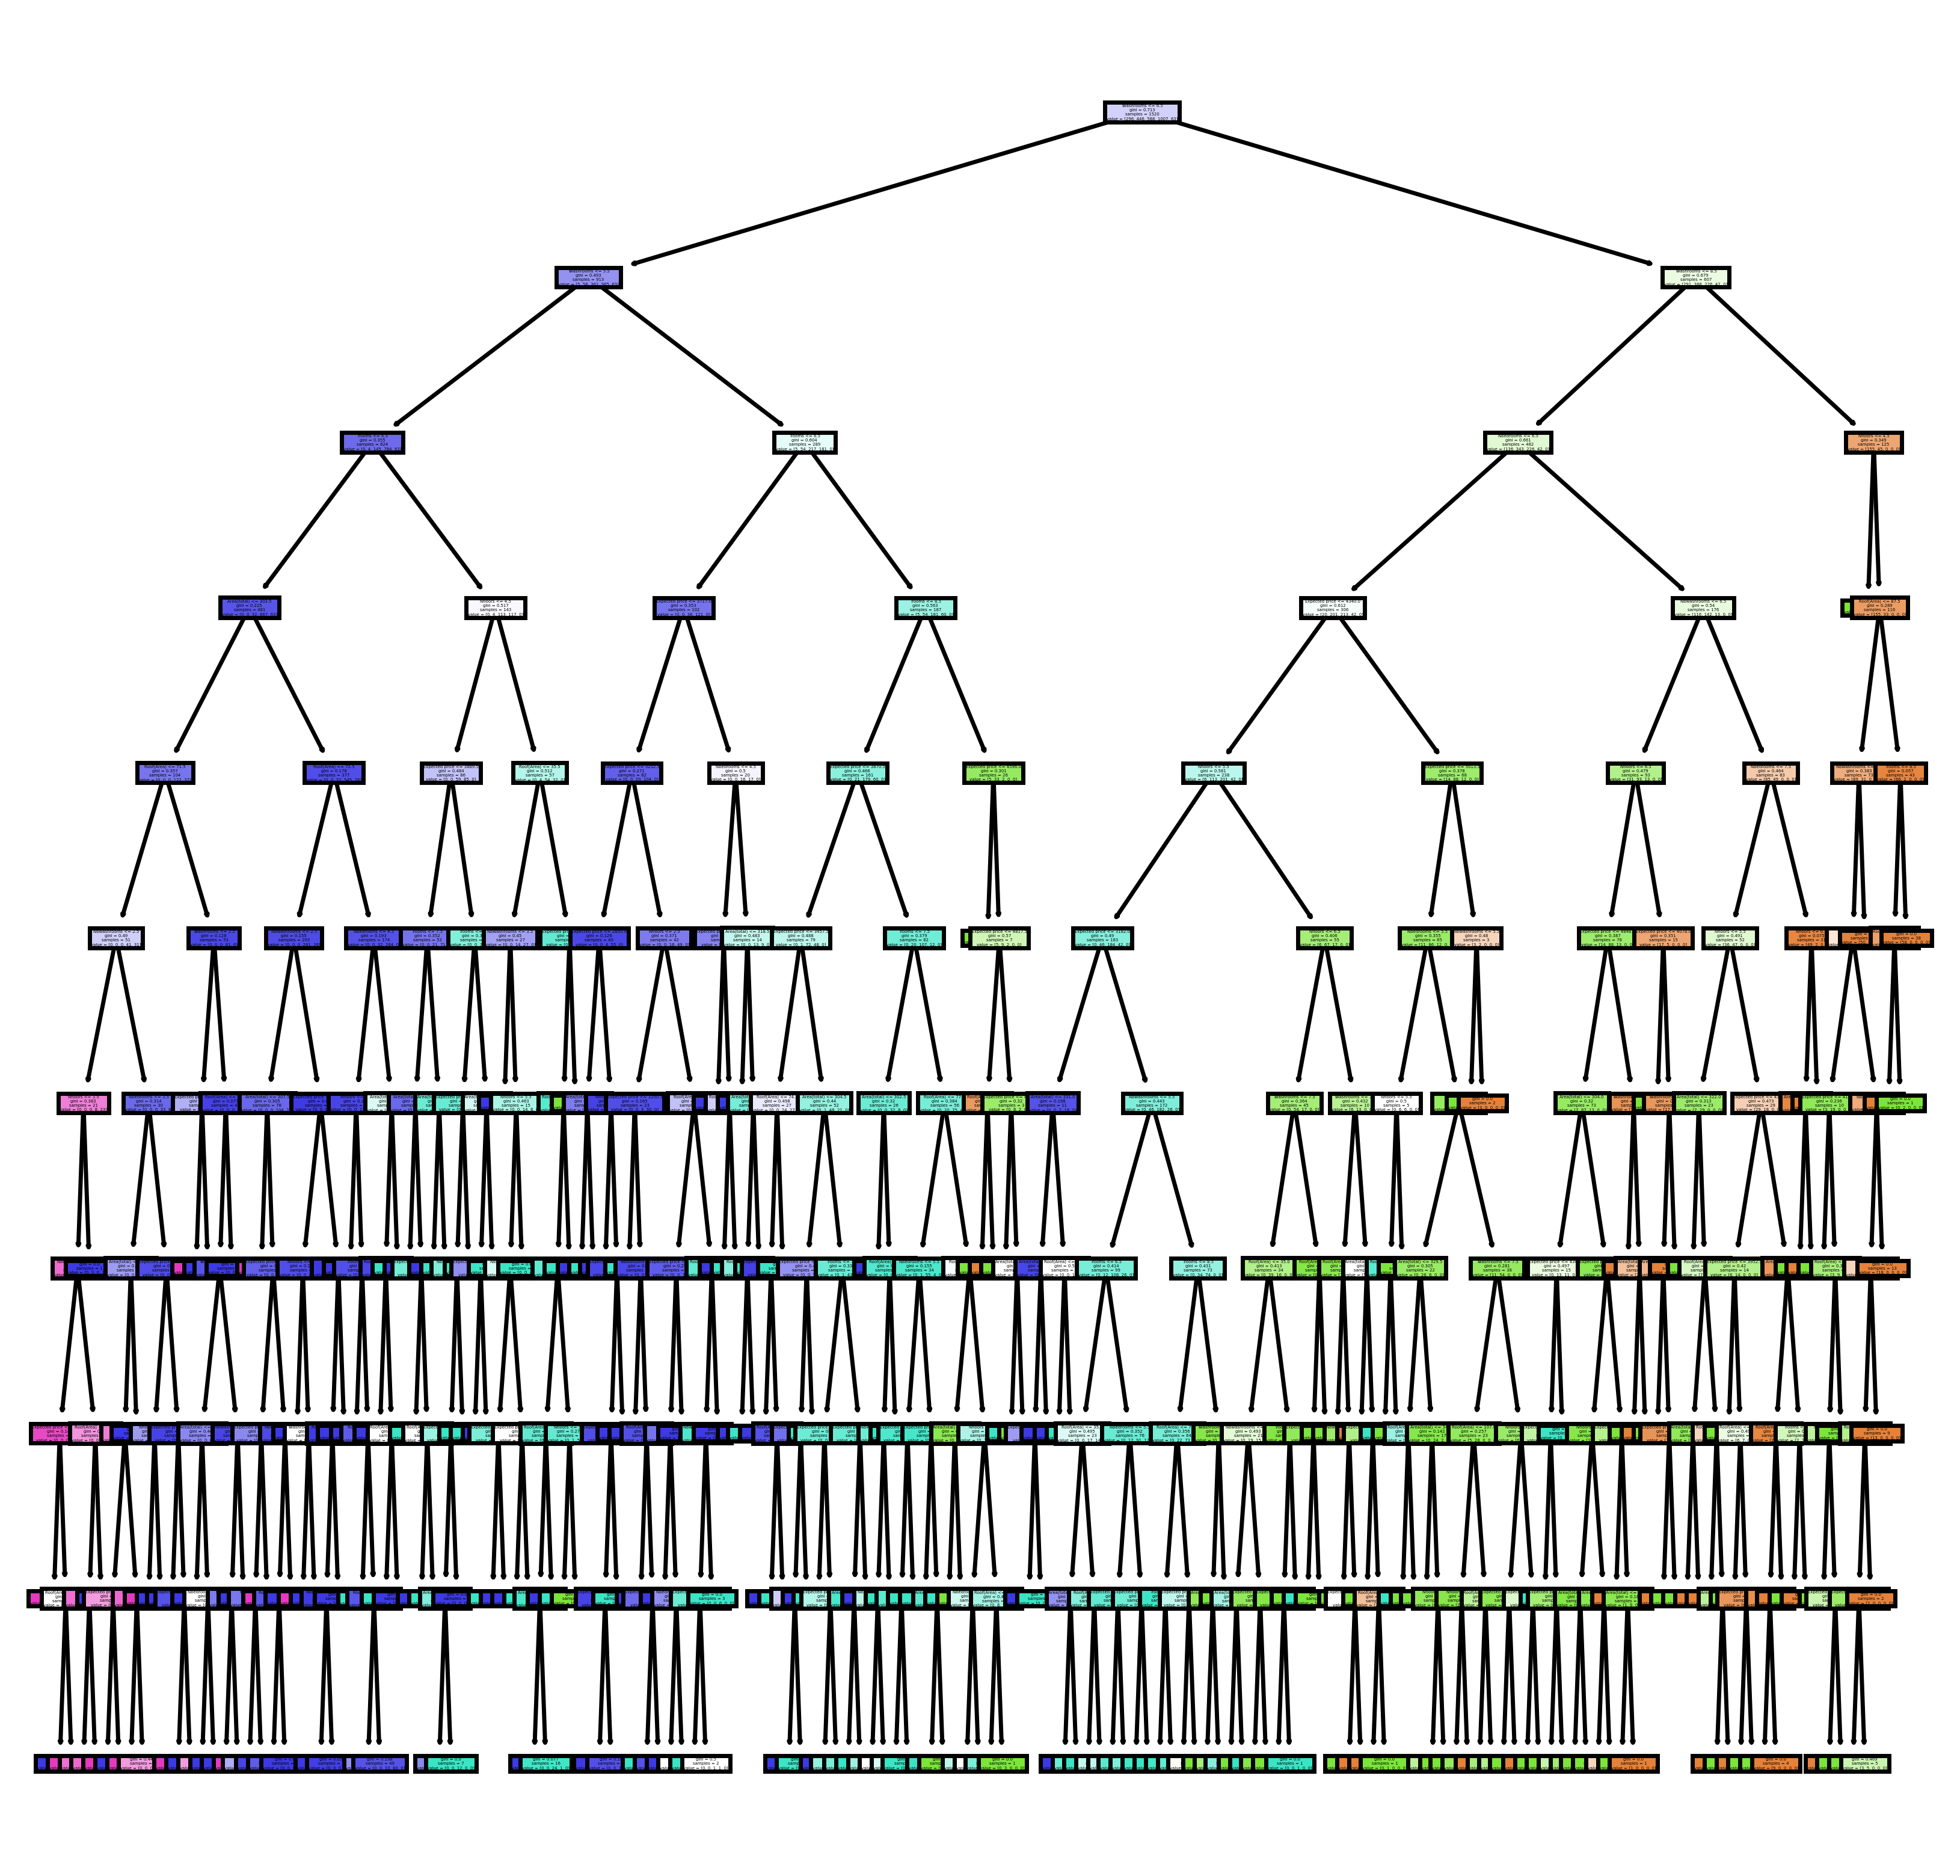

In [130]:
fig, ax = plt.subplots(1,1,figsize = (8,8), dpi=500)

plot_tree(rf[1],
           feature_names = x.columns, 
           filled = True);

fig.savefig('RandomForest.png')

### 5. Adaboost

In [131]:
# Finding the best hyperparameters

ab_models = best_para('ab')
ab_models.sort_values(by='Test_acc',ascending=False)

Estimators  Train_acc   Test_acc  Precision    Recall        F1
9           10  75.708333  77.000000   0.772061  0.770000  0.766042
10          11  75.708333  77.000000   0.772061  0.770000  0.766042
17         100  75.708333  77.000000   0.772061  0.770000  0.766042
16          50  75.708333  77.000000   0.772061  0.770000  0.766042
15          20  75.708333  77.000000   0.772061  0.770000  0.766042
14          15  75.708333  77.000000   0.772061  0.770000  0.766042
13          14  75.708333  77.000000   0.772061  0.770000  0.766042
12          13  75.708333  77.000000   0.772061  0.770000  0.766042
11          12  75.708333  77.000000   0.772061  0.770000  0.766042
18         200  75.708333  77.000000   0.772061  0.770000  0.766042
8            9  75.708333  77.000000   0.772061  0.770000  0.766042
7            8  75.708333  77.000000   0.772061  0.770000  0.766042
6            7  75.708333  77.000000   0.772061  0.770000  0.766042
5            6  75.708333  77.000000   0.772061  0.770000  0.766042
4            5  75.708333  77.000000   0.772061  0.770000  0.766042
3            4  75.708333  77.000000   0.772061  0.770000  0.766042
1            2  67.583333  68.333333   0.591656  0.683333  0.622909
2            3  67.583333  68.333333   0.591656  0.683333  0.622909
0            1  55.416667  55.000000   0.455865  0.550000  0.474209

In [110]:
ab = AdaBoostClassifier(n_estimators = 10).fit(x_train,y_train)

# predicting the test data
ab_pred = ab.predict(x_test)
ab_pred

array([0, 1, 2, 2, 1, 2, 3, 3, 3, 0, 0, 3, 1, 2, 1, 1, 2, 3, 3, 2, 1, 2,
       1, 3, 3, 2, 3, 1, 0, 2, 2, 1, 0, 3, 0, 2, 1, 3, 3, 2, 2, 2, 0, 2,
       2, 3, 1, 3, 2, 3, 3, 0, 1, 3, 0, 3, 0, 2, 3, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 3, 2, 0, 3, 2, 3, 3, 3, 0, 0, 2, 2, 3, 3, 0, 3, 0, 3, 3, 2,
       0, 1, 3, 1, 2, 2, 3, 1, 2, 0, 2, 0, 2, 2, 2, 3, 3, 3, 0, 1, 3, 3,
       3, 1, 0, 3, 3, 3, 2, 0, 2, 3, 1, 1, 0, 0, 2, 3, 3, 2, 2, 2, 3, 2,
       1, 1, 3, 3, 0, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 3, 1, 2,
       3, 3, 0, 1, 3, 2, 2, 2, 3, 1, 2, 0, 1, 2, 3, 2, 2, 3, 3, 3, 3, 0,
       2, 0, 1, 2, 3, 3, 0, 1, 3, 2, 2, 1, 3, 3, 3, 2, 1, 0, 2, 3, 3, 3,
       2, 1, 0, 3, 2, 0, 3, 3, 2, 1, 3, 2, 2, 2, 2, 1, 3, 3, 3, 0, 2, 2,
       3, 0, 3, 3, 3, 3, 0, 2, 3, 0, 3, 2, 2, 2, 3, 3, 1, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 0, 0, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 1, 3, 3, 2, 1, 0,
       3, 3, 3, 0, 2, 0, 3, 2, 0, 2, 3, 1, 3, 3, 1, 1, 2, 3, 3, 2, 2, 1,
       2, 3, 2, 2, 3, 3, 3, 1, 2, 1, 3, 1, 0, 2, 0,

### 6. Stacking

In [132]:
# Creating the stacking model

l0 = list()
l0.append(('RandomForest', rf))
l0.append(('KNN', KNeighborsClassifier()))
l0.append(('NaiveBayes',nb))
l0.append(('DecisionTree',dt))


st = StackingClassifier(estimators = l0,final_estimator = log,cv = 4).fit(x_train,y_train)

# predicting the test data
st_pred = st.predict(x_test)
st_pred

array([0, 1, 2, 2, 1, 1, 3, 3, 3, 0, 0, 3, 1, 2, 1, 1, 2, 3, 3, 2, 1, 2,
       1, 3, 3, 2, 3, 1, 1, 2, 2, 1, 0, 3, 0, 2, 0, 2, 2, 2, 3, 1, 0, 2,
       3, 3, 1, 3, 2, 3, 3, 0, 1, 3, 0, 3, 0, 2, 3, 2, 3, 3, 0, 0, 2, 0,
       0, 2, 3, 2, 0, 3, 3, 3, 3, 3, 0, 1, 2, 3, 2, 3, 0, 3, 1, 3, 3, 2,
       0, 1, 3, 1, 1, 3, 3, 1, 2, 0, 3, 0, 2, 2, 2, 3, 3, 3, 1, 1, 3, 3,
       3, 1, 0, 3, 3, 3, 2, 0, 2, 3, 1, 1, 0, 0, 2, 3, 3, 1, 3, 2, 3, 3,
       1, 1, 3, 3, 0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 1, 2, 3, 3, 1, 2,
       3, 3, 1, 1, 3, 2, 2, 3, 3, 1, 2, 0, 1, 3, 4, 1, 2, 3, 3, 3, 3, 0,
       1, 0, 1, 2, 3, 3, 0, 1, 3, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 2, 4, 3,
       1, 1, 0, 3, 2, 0, 3, 3, 2, 1, 3, 2, 2, 2, 2, 1, 3, 3, 3, 0, 3, 2,
       3, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 2, 1, 1, 3, 4, 1, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 0, 0, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 1, 0,
       3, 3, 3, 0, 2, 0, 3, 3, 0, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 2, 2, 1,
       2, 3, 3, 2, 3, 3, 3, 1, 2, 1, 3, 1, 0, 1, 0,

## Comparing the Models

### Comparing using the Performance Metrics

In [32]:
def metrics(model,x_train,y_train,x_test,y_test):
    f1 = []
    acc_train = []
    acc_test = []
    pres = []
    recal =[]
    for i in model:
        tr = i.score(x_train,y_train) 
        te = i.score(x_test,y_test)
        p = i.predict(x_test)
        dt_prec = precision_score(y_test,p,average = 'weighted')  
        dt_recall = recall_score(y_test,p,average = 'weighted')
        dt_f1 = f1_score(y_test,p,average = 'weighted')

        f1.append(dt_f1)
        pres.append(dt_prec)
        acc_train.append(tr*100)
        acc_test.append(te*100)
        recal.append(dt_recall)
        
    d = pd.DataFrame({'Model':['Log_Reg','NaiveBayes','Decision_tree','Random_Forest','AdaBoost','Stacked'],
                     'Train_acc':acc_train,
                     'Test_acc':acc_test,
                     'Precision':pres,
                     'Recall':recal,
                     'F1':f1})
    
    return(d) 

### The Predicted values

In [133]:
## Creating dataframe of predicted vs actual
df_pred1 = pd.DataFrame({'Actual':y_test,
                        'Logistic_Reg':log_pred,
                        'DecisionTree':dt_pred,
                        'RandomForest':rf_pred,
                        'AdaBoost':ab_pred,
                        'Stacking':st_pred})

df_pred1.head(15)

Actual  Logistic_Reg  DecisionTree  RandomForest  AdaBoost  Stacking
1013       0             0             0             0         0         0
2827       1             0             1             1         1         1
2369       2             3             3             2         2         2
846        2             3             2             2         2         2
1699       1             1             1             1         1         1
2418       1             3             1             1         2         1
10         3             3             4             3         3         3
2027       3             3             3             3         3         3
147        3             3             3             3         3         3
146        0             1             0             0         0         0
2296       0             1             0             0         0         0
489        3             3             3             3         3         3
382        1             3             1             1         1         1
2921       2             3             2             2         2         2
672        1             2             1             1         1         1

In [134]:
models = [log,nb,dt,rf,ab,st]
met = metrics(models,x_train,y_train,x_test,y_test)
met.sort_values(by='Test_acc',ascending=False)

Model  Train_acc   Test_acc  Precision    Recall        F1
5        Stacked  94.333333  88.666667   0.886817  0.886667  0.885722
3  Random_Forest  96.125000  88.166667   0.881982  0.881667  0.881176
2  Decision_tree  90.833333  86.833333   0.870161  0.868333  0.869019
1     NaiveBayes  79.625000  77.666667   0.802952  0.776667  0.783628
4       AdaBoost  75.708333  77.000000   0.772061  0.770000  0.766042
0        Log_Reg  53.833333  55.833333   0.538515  0.558333  0.544736

* Stacking model has highest accuracy for the hol out method followed by Random forest
* Now lets see for various cross validation methods

### Comparing the model with cross validation


In [35]:
def cross_val(model,cv_name,x,y):
    f1 = []
    acc_l = []
    pres = []
    recal =[]
    
    if cv_name.lower() == 'kfold':
        cv = KFold(n_splits=10,shuffle = False,random_state= None)
        for i in models:
            f = cross_val_score(i,x,y,cv=cv,scoring='f1_weighted')
            f = f.mean()
            acc = cross_val_score(i,x,y,cv=cv,scoring='accuracy')
            acc = acc.mean()
            pre = cross_val_score(i,x,y,cv=cv,scoring = 'precision_weighted')
            pre = pre.mean()
            re = cross_val_score(i,x,y,cv=cv,scoring = 'recall_weighted')
            re = pre.mean()
            
            f1.append(f)
            pres.append(pre)
            acc_l.append(acc*100)
            recal.append(re)
            

        d = pd.DataFrame({'Model':['Logistic_Reg','NaiveBayes','Decision_tree','Random_Forest','AdaBoost','Stacked'],
                         'Accuracy':acc_l,
                         'Precision':pres,
                         'Recall':recal,
                         'F1':f1})
        return (d)
    
    if cv_name.lower() == 'skfold':
        cv = StratifiedKFold(n_splits=10,shuffle = False,random_state= None)
        for i in models:
            f = cross_val_score(i,x,y,cv=cv,scoring='f1_weighted')
            f = f.mean()
            acc = cross_val_score(i,x,y,cv=cv,scoring='accuracy')
            acc = acc.mean()
            pre = cross_val_score(i,x,y,cv=cv,scoring = 'precision_weighted')
            pre = pre.mean()
            re = cross_val_score(i,x,y,cv=cv,scoring = 'recall_weighted')
            re = pre.mean()
            
            f1.append(f)
            pres.append(pre)
            acc_l.append(acc*100)
            recal.append(re)
            

        d_sf = pd.DataFrame({'Model':['Logistic_Reg','NaiveBayes','Decision_tree','Random_Forest','AdaBoost','Stacked'],
                         'Accuracy':acc_l,
                         'Precision':pres,
                         'Recall':recal,
                         'F1':f1})
        return (d_sf)

### Kfold Method

In [135]:
# Kfold Method
cv_kfold = cross_val(models,'kfold',x,y)
cv_kfold.sort_values(by='Accuracy',ascending=False)

Model   Accuracy  Precision    Recall        F1
0   Logistic_Reg  88.100000   0.865036  0.865036  0.870616
5        Stacked  87.600000   0.876200  0.876200  0.876249
3  Random_Forest  86.400000   0.864902  0.864902  0.858664
2  Decision_tree  83.466667   0.831651  0.831651  0.830619
1     NaiveBayes  79.166667   0.808808  0.808808  0.796405
4       AdaBoost  59.966667   0.607943  0.607943  0.573661

### Stratified Kfold

In [136]:
# Stratified Kfold
cv_skfold = cross_val(models,'skfold',x,y)
cv_skfold.sort_values(by='Accuracy',ascending=False)

Model   Accuracy  Precision    Recall        F1
0   Logistic_Reg  88.200000   0.864491  0.864491  0.871236
5        Stacked  87.533333   0.874525  0.874525  0.872150
3  Random_Forest  87.000000   0.861795  0.861795  0.865878
2  Decision_tree  83.766667   0.839172  0.839172  0.838425
1     NaiveBayes  79.166667   0.808216  0.808216  0.796201
4       AdaBoost  60.400000   0.610658  0.610658  0.577008

### Comparing the models using Confusion Matrix



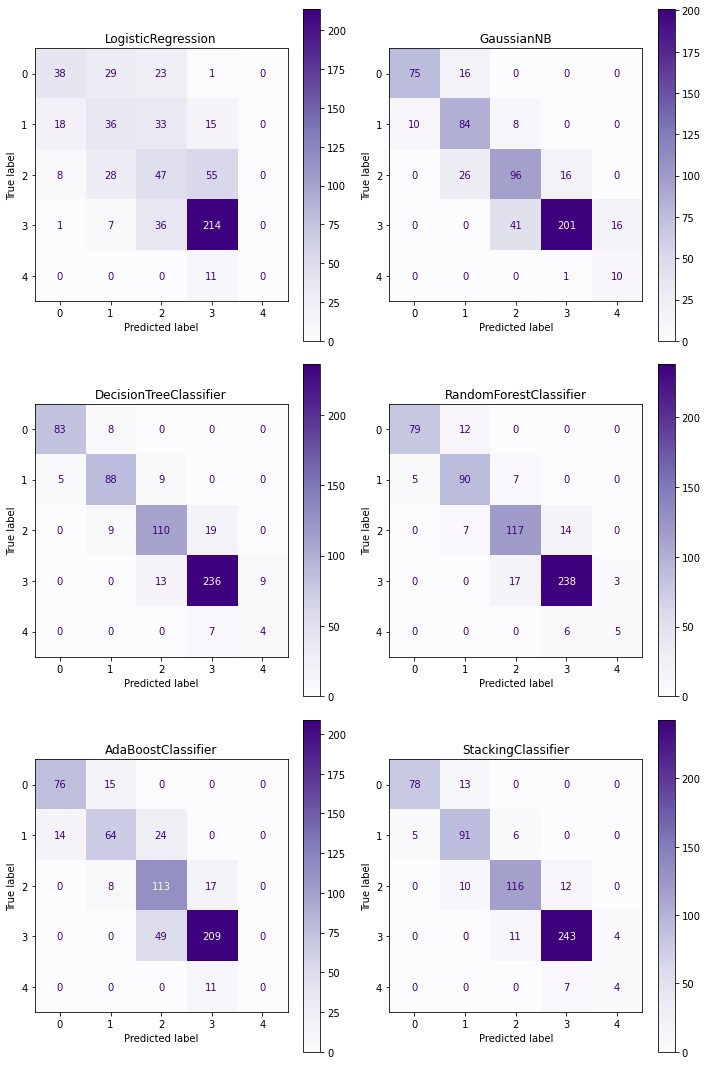

In [137]:
fig,ax = plt.subplots(3,2,figsize = (10,15))
a = 0
for i,ax in zip(models,ax.flatten()):
    plot_confusion_matrix(i,x_test,y_test,cmap = 'Purples',ax=ax) 
    ax.title.set_text(type(i).__name__)

plt.tight_layout()
plt.show()

* The metrics of stacking model is high for hold out out method
* The logistic reg perform better in other cross validation like stratified-kfold,kfold
* Both the models are good based on the type of data splitting we are using
* Since it is a multiclass classification we cannot use auc or roc curve for calculating the metrics of models

### Comparing the models using AUC and ROC curve

In [45]:
# # Cal Roc,Auc

# log_roc = roc_auc_score(y_test,log.predict_proba(x_test)[:1],multi_class='ovo')
# log_auc = roc_auc_score(y_test,log_pred,multi_class='ovo')

# nb_roc = roc_auc_score(y_test,nb.predict_proba(x_test)[:,1],multi_class='ovo') # Taking only the positive values
# nb_auc = roc_auc_score(y_test,nb_pred,multi_class='ovo')        # AUC value

# dt_roc = roc_auc_score(y_test,dt.predict_proba(x_test)[:,1],multi_class='ovo')
# dt_auc = roc_auc_score(y_test,dt_pred,multi_class='ovo')


# print(f"NB_Roc = {log_roc} | NB_AUC = {log_auc}")
# print(f"NB_Roc = {nb_roc} | NB_AUC = {nb_auc}")
# print(f"DT_Roc = {dt_roc} | DT_AUC = {dt_auc}")

In [ ]:
# from sklearn.utils.fixes import linspace
# # ROC,AUC Plot

# plt.plot(fpr,tpr,marker = ',',label = 'Logit Curve')    # Creating the logit curve 
# plt.plot([0,1],[0,1],linestyle='--',label = 'No Skill') # Creating the Staright line
# plt.xlim([-0.05,1.05])                                # Setting the graphs(axis) limits
# plt.ylim([-0.05,1.05])
# plt.xlabel('False Positive Rate')     # Setting the xlabel         
# plt.ylabel('True Positive Rate')      # Setting the ylabel
# plt.title('ROC_AUC Curve')
# plt.legend()
# plt.show()

### Since the data has Multicollinearity lets try with LDA

In [155]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = lda.fit_transform(x_train,y_train)
X_test = lda.transform(x_test)

### Logistic Regression

In [156]:
log_lda = LogisticRegression().fit(X_train,y_train)

# Predict
log_lda_pred = log_lda.predict(X_test)
log_lda_pred

array([0, 0, 2, 2, 1, 1, 3, 3, 3, 1, 0, 3, 1, 2, 1, 2, 2, 3, 3, 2, 2, 2,
       0, 3, 3, 2, 3, 2, 1, 2, 2, 1, 0, 3, 0, 2, 0, 2, 2, 2, 3, 1, 0, 2,
       3, 3, 0, 3, 2, 3, 3, 0, 1, 3, 0, 3, 1, 2, 3, 2, 2, 3, 1, 0, 2, 1,
       0, 2, 3, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 3, 0, 3, 1, 3, 3, 2,
       0, 0, 3, 1, 1, 3, 3, 1, 2, 0, 3, 0, 2, 2, 2, 3, 3, 3, 0, 1, 3, 3,
       3, 0, 0, 3, 3, 3, 3, 0, 1, 3, 1, 1, 0, 0, 2, 3, 3, 1, 3, 2, 3, 3,
       1, 0, 4, 3, 1, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 3, 1, 2,
       3, 3, 1, 1, 3, 1, 2, 3, 3, 0, 2, 0, 1, 3, 4, 1, 2, 3, 3, 3, 3, 0,
       1, 0, 0, 1, 3, 3, 0, 1, 3, 2, 2, 1, 3, 3, 3, 3, 1, 1, 2, 3, 4, 3,
       1, 1, 0, 3, 2, 0, 3, 3, 2, 1, 3, 2, 2, 2, 2, 1, 3, 3, 3, 0, 3, 2,
       3, 0, 3, 3, 3, 3, 0, 2, 3, 0, 3, 2, 1, 1, 3, 4, 1, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 0, 0, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 1, 0,
       3, 3, 3, 0, 2, 1, 3, 2, 0, 3, 3, 1, 4, 3, 1, 1, 1, 3, 3, 2, 2, 2,
       2, 3, 3, 2, 3, 3, 3, 1, 2, 1, 3, 1, 1, 1, 1,

In [159]:
ac = log_lda.score(X_test,y_test)
ac

0.8666666666666667

In [157]:
X_test = X_test.reshape(-1,1)

### Decision Tree

In [161]:
dt_lda = DecisionTreeClassifier(max_depth=10,min_samples_leaf=6).fit(X_train,y_train)

# Predict
dt_lda_pred = dt_lda.predict(X_test)
dt_lda_pred

ac = dt_lda.score(X_test,y_test)
ac

0.8333333333333334

### Random Forest

In [162]:
rf_lda = RandomForestClassifier(max_depth=10,min_samples_leaf=1,n_estimators = 13).fit(X_train,y_train)

# Predict
rf_lda_pred = rf_lda.predict(X_test)
rf_lda_pred

ac = rf_lda.score(X_test,y_test)
ac

0.83

* After dimensionality reduction the accuracy of the model seems to e less than before dimensionality reduction
* Hence we can consider the features and the data we are already using
* Eventhough the Logistic regression has better accuracy tha other models, highest accuracy ranges around 89%.
* The main reason for this might be due to the multicollinearity of the data
